In [11]:
#მოდულების იმპორტი
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#მონაცემთა ბაზასთან კავშირი
conn = sqlite3.connect('games.sqlite')
cursor = conn.cursor()

In [7]:
#მონაცემების პოვნა და ბეჭდვა
#იმ თამაშის სახელის, პლატფორმის, ჟანრის, გამომცემლის გამოტანა, რომელიც გამოვიდა 2016 წელს და გაიყიდა 1 მილიონზე მეტი კოპია
query = "SELECT field2,field3,field5,field6 FROM games WHERE field4 = 2016 AND field11 > 1"
cursor.execute(query)
result_one = cursor.fetchone()
if result_one:
    print(result_one)
    print()
cursor.execute(query)
result_5 = cursor.fetchmany(5)
for row in result_5:
    print(row)
print()
cursor.execute(query)
result = cursor.fetchall()
for row in result:
    print(row)
    



('FIFA 17', 'PS4', 'Sports', 'Electronic Arts')

('FIFA 17', 'PS4', 'Sports', 'Electronic Arts')
("Uncharted 4: A Thief's End", 'PS4', 'Shooter', 'Sony Computer Entertainment')
("Tom Clancy's The Division", 'PS4', 'Shooter', 'Ubisoft')
('Far Cry: Primal', 'PS4', 'Action', 'Ubisoft')
("Tom Clancy's The Division", 'XOne', 'Shooter', 'Ubisoft')

('FIFA 17', 'PS4', 'Sports', 'Electronic Arts')
("Uncharted 4: A Thief's End", 'PS4', 'Shooter', 'Sony Computer Entertainment')
("Tom Clancy's The Division", 'PS4', 'Shooter', 'Ubisoft')
('Far Cry: Primal', 'PS4', 'Action', 'Ubisoft')
("Tom Clancy's The Division", 'XOne', 'Shooter', 'Ubisoft')
('Overwatch', 'PS4', 'Shooter', 'Activision')
("No Man's Sky", 'PS4', 'Action', 'Hello Games')
('Dark Souls III', 'PS4', 'Role-Playing', 'Namco Bandai Games')
('FIFA 17', 'XOne', 'Sports', 'Electronic Arts')
('Doom (2016)', 'PS4', 'Shooter', 'Bethesda Softworks')
('Yokai Watch 3', '3DS', 'Action', 'Level 5')
('Madden NFL 17', 'PS4', 'Sports', 'Electronic Art

In [8]:
#ახალი მონაცემების დამატება მომხმარებლის მიერ
name = input("Enter name of the game: ")
platform = input("Platform: ")
year = input("Enter year: ")
genre = input("Enter genre: ")
publisher = input("Enter a publisher: ")
na_Sales = input("Enter sales in North America: ")
eu_Sales = input("Enter sales in Europe: ")
jp_Sales = input("Enter sales in Japan: ")
oth_Sales = input("Enter sales in other countries: ")
gl_Sales = input("Enter global sales: ")


cursor.execute("""INSERT INTO games (field2,field3,field4,field5,field6,field7,field8,field9,field10,field11)
VALUES (?,?,?,?,?,?,?,?,?,?)""", (name,platform,year,genre,publisher,na_Sales,eu_Sales,jp_Sales,oth_Sales,gl_Sales))

#ცვლილებების დამახსოვრება 
conn.commit()


Enter name of the game:  Grand Theft Auto V
Platform:  PS4
Enter year:  2013
Enter genre:  Action
Enter a publisher:  Rockstar Games
Enter sales in North America:  8.76
Enter sales in Europe:  9.21
Enter sales in Japan:  0.30
Enter sales in other countries:  1.20
Enter global sales:  19.47


In [4]:
#მონაცემების განახლება
game_info_upd = input("Enter a game to update: ")
new_platform = input("Platform: ")
new_year = input("Enter year: ")
new_genre = input("Enter genre: ")
new_publisher = input("Enter a publisher: ")
new_na_Sales = input("Enter sales in North America: ")
new_eu_Sales = input("Enter sales in Europe: ")
new_jp_Sales = input("Enter sales in Japan: ")
new_oth_Sales = input("Enter sales in other countries: ")
new_gl_Sales = input("Enter global sales: ")

cursor.execute("""UPDATE games SET field3=?,field4=?,field5=?,field6=?,field7=?,field8=?,field9=?,field10=?,field11=? WHERE field2=?""",
(new_platform,new_year,new_genre,new_publisher,new_na_Sales,new_eu_Sales,new_jp_Sales,new_oth_Sales,new_gl_Sales,game_info_upd))

conn.commit()

Enter a game to update:  God of War
Platform:  PS4
Enter year:  2018
Enter genre:  Action
Enter a publisher:  Sony Interactive Entertainment
Enter sales in North America:  3.21
Enter sales in Europe:  2.72
Enter sales in Japan:  0.102
Enter sales in other countries:  1.01
Enter global sales:  7.22


In [6]:
#მონაცემის წაშლა
game_to_del = input("Enter a game to delete: ")
cursor.execute("DELETE FROM games WHERE field2=?",(game_to_del,))
conn.commit()

Enter a game to delete:  God of War III


In [13]:
#გამოთვლის ფუნქციები

#ჟანრის მიხედვით
def count_genre(genre):
    res = cursor.execute("SELECT COUNT(*) FROM games WHERE field5=?",(genre,))
    return res.fetchone()[0]

#პლატფორმის მიხედვით
def count_platform(platform):
    res = cursor.execute("SELECT COUNT(*) FROM games WHERE field3=?", (platform,))
    return res.fetchone()[0]

#გლობალური გაყიდვების მიხედვით
def count_global_sales(year):
    res = cursor.execute("SELECT SUM(field11) FROM games WHERE field4=?", (year,))
    return res.fetchone()[0]

#ახალი თამაში წელიწადში
def games_made_yearly(year):
    res = cursor.execute("SELECT COUNT(*) field2 FROM games WHERE field4=?",(year,))
    return res.fetchone()[0]
    
    

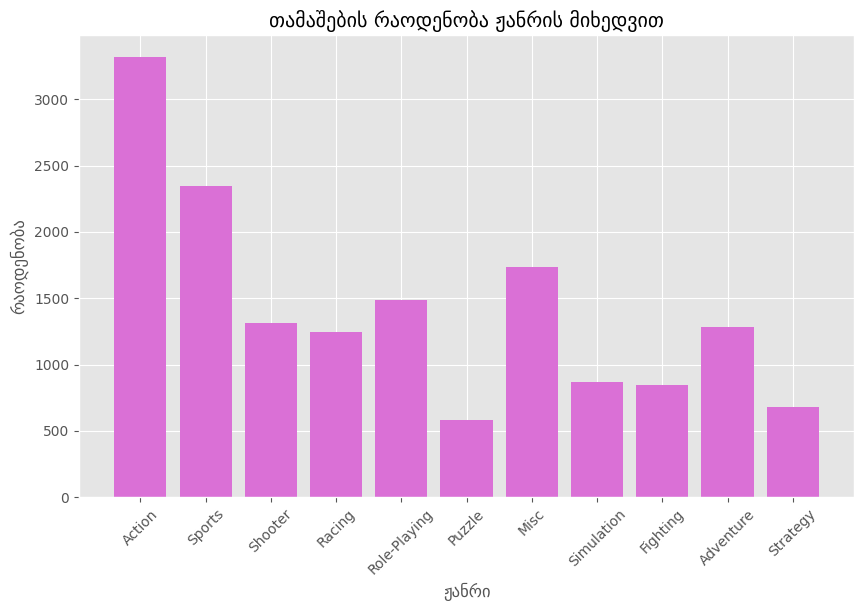

In [33]:
#დიაგრამა ყველაზე პოპულარული ჟანრი
genres = ['Action', 'Sports', 'Shooter', 'Racing',"Role-Playing","Puzzle","Misc","Simulation","Fighting","Adventure","Strategy"]
counts = [count_genre(genre) for genre in genres]

plt.figure(figsize=(10,6))

bars = plt.bar(genres,counts,color='orchid')
plt.title("თამაშების რაოდენობა ჟანრის მიხედვით")
plt.xlabel("ჟანრი")
plt.ylabel("რაოდენობა")
plt.xticks(rotation=45)
plt.show()

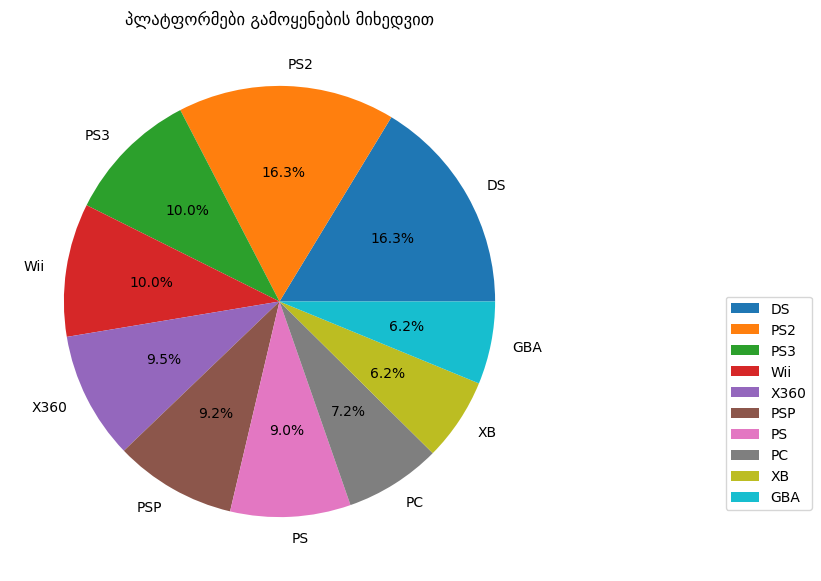

In [14]:
#ყველაზე პოპულარული პლატფორმა
platforms = ['Wii','NES','GB','DS','X360','PS3','PS2','SNES','GBA','3DS','PS4','N64','PS','XB',
             'PC','2600','PSP','XOne','GC','WiiU','GEN','DC','PSV','SAT','SCD','WS','NG','TG16',
             '3DO','GG','PCFX']
counts = [count_platform(platform) for platform in platforms]

#Top 10 ის ამორჩევა
all = list(zip(platforms,counts))
all.sort(key=lambda x: x[1], reverse=True)
top10 = all[:10]
sorted_plat , sorted_counts = zip(*top10)

plt.figure(figsize=(7,7))
pie = plt.pie(sorted_counts, labels=sorted_plat, autopct='%1.1f%%')
plt.title("პლატფორმები გამოყენების მიხედვით")
plt.legend(sorted_plat, loc="lower right",bbox_to_anchor=(1.5, 0.1))
plt.show()


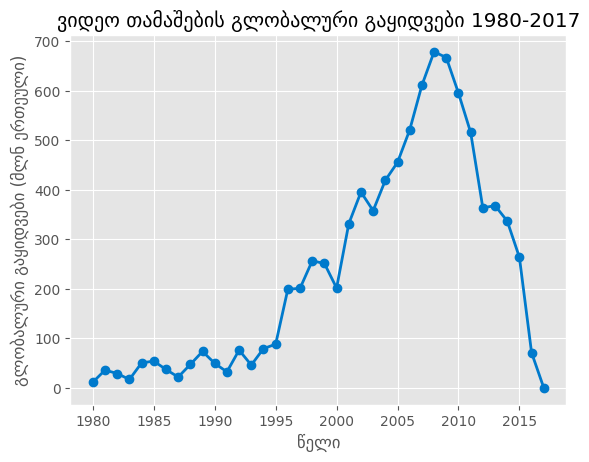

In [60]:
#გლობალური გაყიდვები 1980-2017
years = list(range(1980,2018))
gl_sales = [count_global_sales(year) for year in years]

plt.plot(years, gl_sales, marker='o', linestyle='-', linewidth=2, color='#007ACC')
plt.title("ვიდეო თამაშების გლობალური გაყიდვები 1980-2017")
plt.xlabel("წელი")
plt.ylabel("გლობალური გაყიდვები (მლნ ერთეული)")
plt.style.use("ggplot")
plt.show()



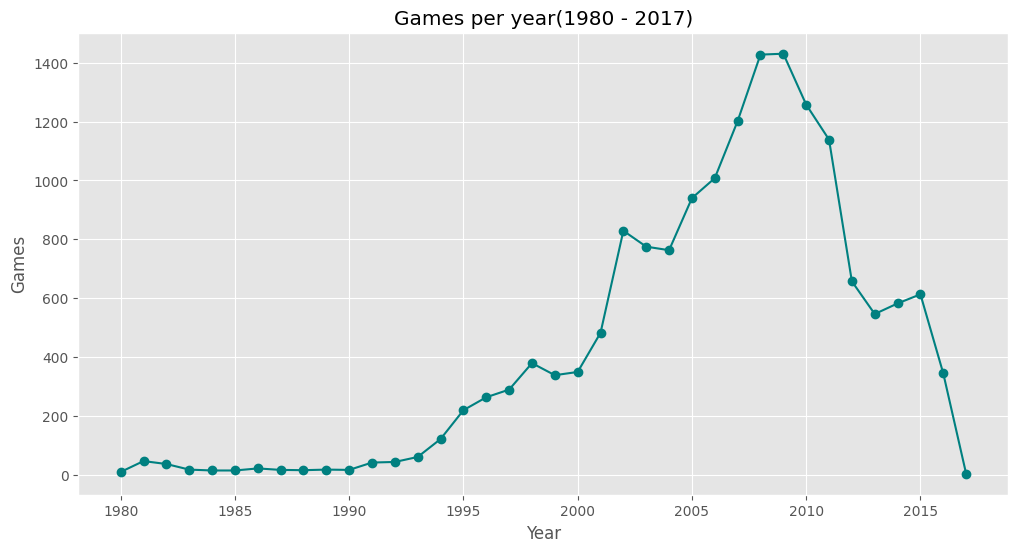

In [83]:
#წელიწადში გამოშვებული თამაშები
years = list(range(1980,2018))
counts = [games_made_yearly(year) for year in years]
plt.figure(figsize=(12,6))
plt.plot(years, counts, marker='o', linestyle='-', color='teal')
plt.title("Games per year(1980 - 2017)")
plt.xlabel("Year")
plt.ylabel("Games")
plt.show()




In [5]:
#მონაცემთა ბაზასთან კავშირის დახურვა
conn.close()